In [1]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from alpaca_trade_api.rest import REST, TimeFrame
import hvplot.pandas
from scipy.interpolate import interp1d
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf
from pandas_datareader import data as pdr
import FinanceDataReader as fdr


import modified_pmt as pmt

In [6]:
load_dotenv()

True

### List of functions

fetch_stock_data(start_date, end_date, stock_list) <br>
weights(stock_list, repeats) <br>
annual_portfolio_return(df, weight_list) <br>
annual_portfolio_risk(df, weight_list) <br>
mc_sim(df, weight_list, timeframe, nsims, investment_amount = 1, kind = 'line') <br>
mc_sim_comparison(df, df2, weight_1, weight_2, timeframe, nsims, investment_amount = 1) <br>
actual_return_plot(df, weight_list, timeframe, investment_amount = 1) <br>
yearly_portfolio_info(df, weight_list) <br>
opportunity_set(df, my_weights, repeats, risk_free_return = 0, cal = False) <br>

In [2]:
stock_list = ['TSM', 'META', 'GME', 'AAPL', 'ORCL']
df = pmt.fetch_stock_data('2016-01-01', '2022-12-31', stock_list)

In [3]:
df

,TSM,META,GME,AAPL,ORCL
Date,,,,,
2016-01-04,22.090000,102.220001,7.077500,26.337500,35.750000
2016-01-05,21.950001,102.730003,7.192500,25.677500,35.639999
2016-01-06,21.340000,102.970001,7.092500,25.174999,35.820000
2016-01-07,21.100000,97.919998,7.112500,24.112499,35.040001
2016-01-08,20.809999,97.330002,7.092500,24.240000,34.650002
...,...,...,...,...,...
2022-12-23,74.889999,118.040001,20.080000,131.860001,80.849998
2022-12-27,74.320000,116.879997,18.200001,130.029999,80.980003
2022-12-28,73.059998,115.620003,17.920000,126.040001,80.330002


In [4]:
my_weight = [0.15, 0.15, 0.2, 0.4, 0.1]
print(sum(my_weight))

1.0


In [5]:
display(pmt.annual_portfolio_return(df, my_weight))
display(pmt.annual_portfolio_risk(df, my_weight))

0.3322561385703578

0.3484021940145517

In [6]:
pmt.yearly_portfolio_info(df, my_weight)

:Bars   [index,Variable]   (value)

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,median,percentile_0,percentile_1,percentile_2,percentile_3
0,1.019174,0.979278,0.993001,1.036657,0.986882,1.000670,1.022090,1.015257,1.001545,0.971184,...,1.015107,1.010467,1.048265,1.020001,1.027570,1.002959,0.959570,0.987727,1.017761,1.043540
1,1.016170,0.967228,1.001594,1.037695,0.961406,0.991520,0.994948,0.992492,1.012282,0.980027,...,1.015382,1.006124,1.036035,1.039736,1.043242,1.005139,0.948775,0.985100,1.024770,1.070841
2,1.025004,0.955863,0.991231,1.022217,0.954425,0.981685,1.012326,0.949011,0.989139,0.979264,...,1.032274,1.037919,1.043258,1.021119,1.024608,1.005207,0.932238,0.980670,1.032438,1.082561
3,1.027664,0.937011,0.953572,1.022730,0.999709,0.977629,1.030006,0.949226,1.010647,1.002101,...,1.060361,1.063065,1.052999,1.049797,1.055159,1.008324,0.920801,0.980414,1.039292,1.088681
4,1.008827,0.919598,0.934934,1.031183,1.010104,0.994271,1.054456,0.912334,1.041534,1.039351,...,1.068393,1.072566,1.080033,1.053239,1.008876,1.010833,0.917112,0.976757,1.044269,1.099021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,3.593280,1.151060,7.137348,4.555467,2.956935,1.656665,2.156868,4.071194,1.144773,2.760863,...,0.917445,3.220822,1.462799,0.743789,1.798814,2.351435,0.655122,1.538477,3.374242,6.890643
752,3.569665,1.159552,7.217296,4.520811,2.955902,1.584633,2.101265,3.962002,1.124047,2.611613,...,0.912930,3.296699,1.446802,0.734844,1.851278,2.358612,0.657394,1.550445,3.407845,6.932757
753,3.585684,1.145415,6.976385,4.492940,2.916253,1.628910,2.110604,3.985480,1.141944,2.585513,...,0.927130,3.372969,1.491329,0.747052,1.847609,2.345768,0.653485,1.558644,3.394558,6.909752
754,3.467157,1.115514,7.072008,4.291414,2.802545,1.627993,2.099354,3.911910,1.139635,2.501184,...,0.946640,3.422525,1.456986,0.750089,1.805763,2.371231,0.646928,1.560481,3.417951,7.170854


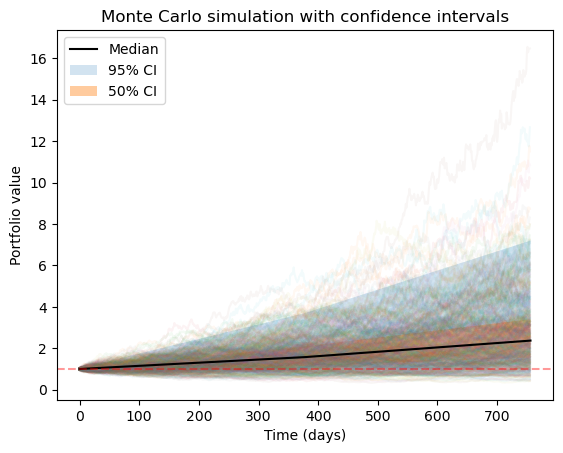

In [7]:
pmt.mc_sim(df, my_weight, 252 *3, 500, kind = 'visualize_ci')

Your portfolio consists of: 
15.00% of TSM
15.00% of META
20.00% of GME
40.00% of AAPL
10.00% of ORCL
------------------------------
Optimal risky portfolio consists of: 
28.73% of TSM
0.55% of META
10.50% of GME
49.72% of AAPL
10.50% of ORCL
------------------------------
Safest portfolio consists of: 
20.59% of TSM
4.41% of META
1.47% of GME
26.47% of AAPL
47.06% of ORCL
------------------------------


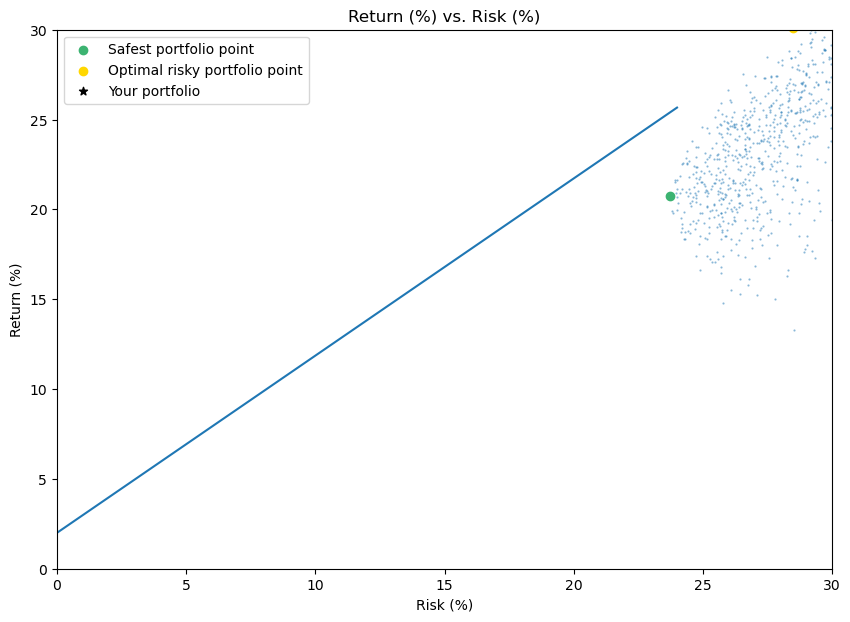

In [8]:
opt_weight = pmt.opportunity_set(df, my_weight, 2000, risk_free_return = 2, cal = True)

In [9]:
opt_weight

[0.2873, 0.0055, 0.105, 0.4972, 0.105]

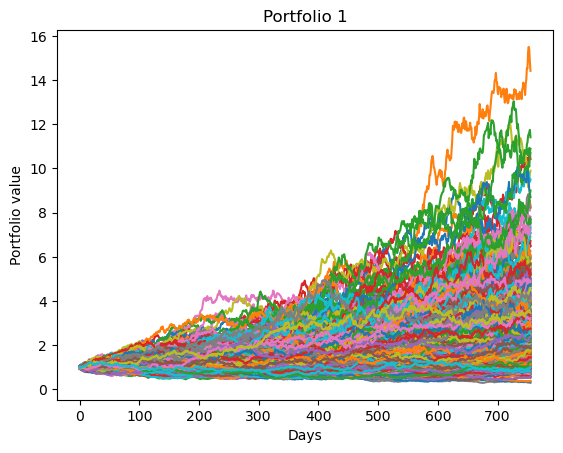

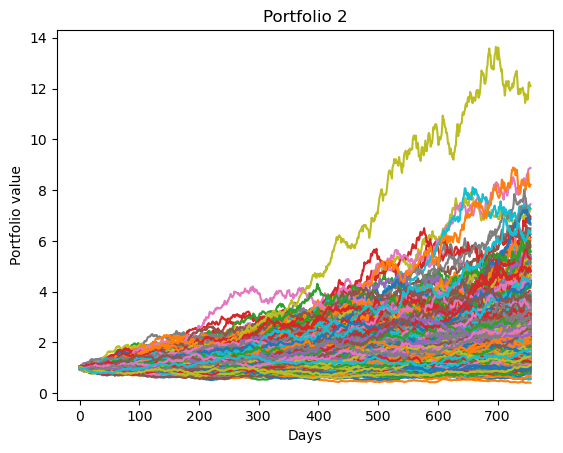

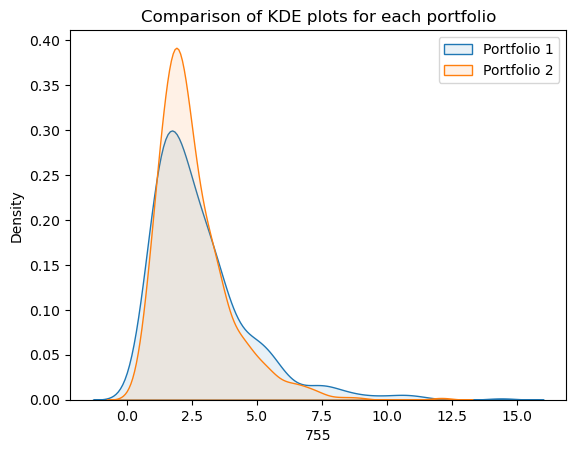

In [10]:
pmt.mc_sim_comparison(df, df, my_weight, opt_weight, 252*3, 500)

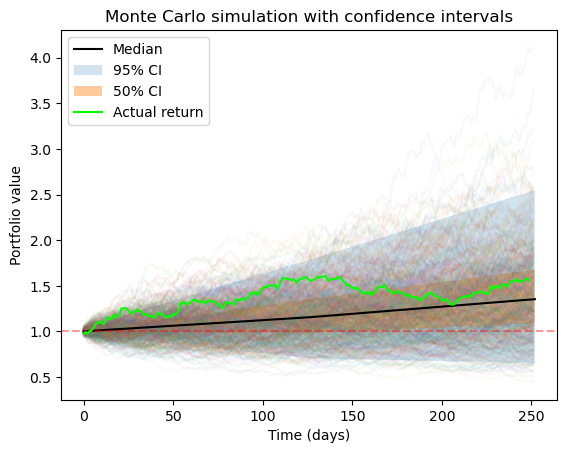

In [11]:
pmt.mc_sim(df, my_weight, 252, 500, kind = 'visualize_ci')
pmt.actual_return_plot(df, my_weight, 365)